# Question 1 : Classification using Naive Bayes

Can glucose and blood pressure data classify whether a patient has diabetes or not ? If yes, which classification algorithm should you use ?

The dataset **diabetes_classification.csv** has 3 columns and 995 entries with the above data.


1. Load the dataset.

In [8]:
import pandas as pd
a = pd.read_csv("diabetes.csv")
a.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


2. The dataset has two feature columns and one target column. Plot a bar graph or histogram showing the distribution of values in the feature columns (count of each value).

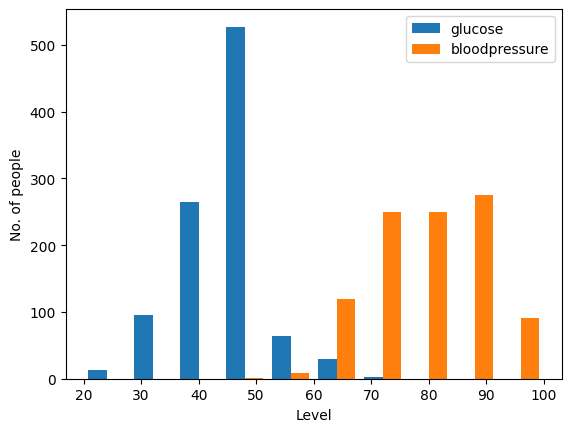

In [9]:
import matplotlib.pyplot as plt

plt.hist([a['glucose'], a['bloodpressure']],
         label=['glucose', 'bloodpressure'])
plt.xlabel('Level')
plt.ylabel('No. of people')
plt.legend()
plt.show()

 The feature column **glucose** has a somewhat Gaussian distribution of data. So we will try out Gaussian Naive Bayes classification for the data using Scikit-Learn.

3. Split the dataset.
4. Fit a Gaussian NB model on the data. Make predictions and find the accuracy score.

Optional :
5. Compare the model with other classification algorithms like Logistic Regression, KNN, decision tree etc.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X = a[['glucose']]
y = a['diabetes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print("Accuracy Score :", accuracy_score(y_test, y_pred))

Accuracy Score : 0.723404255319149


# Question 2 : Regression using SVM and Tree Algorithms

In this question, we will be using the **insurance.csv** file which contain information on insurance charges based on the following informations: age,sex,bmi,region,number of children and whether the person is a smoker or not. You need to predict the charges based on the information given.

### 1. Load the data.

In [30]:
import pandas as pd
b= pd.read_csv("insurance.csv")
b.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 2. Separate the numerical and categorical columns.
### 3. Label Encode the categorical columns.
### 4. Scale the numerical columns. (Scale the charges separately so that you can calculate errors afterwards.)

In [61]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

numerical_cols = ['age', 'bmi', 'children', 'charges']
categorical_cols = ['sex', 'smoker', 'region']

label_encoder = LabelEncoder()
b[categorical_cols] = b[categorical_cols].apply(
    lambda col: label_encoder.fit_transform(col))

charges = b['charges']
b.drop('charges', axis=1)

scaler = StandardScaler()
b[numerical_cols] = scaler.fit_transform(b[numerical_cols])
charges_scaler = StandardScaler()
charges = scaler.fit_transform(charges.values.reshape(-1, 1))

b['charges'] = charges

### 5. Split the data.

In [62]:
from sklearn.model_selection import train_test_split

X = b.iloc[0:1338, 0:6]
y = b.iloc[0:1338, 6]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


### 6. Support Vector Regressor

Here , you will use the SVR model from sklearn.svm and fit it on the training data. Then predict on the test data and calaculate MAE, MSE. But...

The SVR class contains many hyperparameters, example : kernel can have the following values : linear, rbf, poly, sigmoid.

Use **RandomizedSearchCV** from sklearn.model_selection , create a dictionary with keys 'kernel' and 'gamma' . As values of the keys, create a list of some possible values. Run a 3-fold cross validation test (cv=3) and find the best parameters. Then initiate the SVR model with those parameters.

In [63]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

hyperparameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': [0.1, 0.01, 0.001]
}

svr = SVR()

# creating a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=svr, param_distributions=hyperparameters, cv=3, n_iter=12, random_state=42)
random_search.fit(X_train, y_train)

# getting the best parameters found by RandomizedSearchCV
best_hyperparameters = random_search.best_params_

# initializing an SVR model with the best parameters
best_svr = SVR(
    kernel=best_hyperparameters['kernel'], gamma=best_hyperparameters['gamma'])
best_svr.fit(X_train, y_train)

predictions = best_svr.predict(X_test)

print("Mean Absolute Error :", mean_absolute_error(y_test, predictions))
print("Mean Squared Error :", mean_squared_error(y_test, predictions))


Mean Absolute Error : 0.19964944448161415
Mean Squared Error : 0.14579117734945954


### 7. AdaBoost Regressor

We would do similar for AdaBoostRegressor from sklearn.ensemble . Here, the hyperparameters are n_estimators and loss.

Instead of RandomizedSearchCV, let's try GridSearchCV . Find the best parameters and then find errors on test data using the model with best parameters.

In [64]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

hyperparameters = {
    'n_estimators': [50, 100, 200],
    'loss': ['linear', 'square', 'exponential']
}

adaboost = AdaBoostRegressor()

# creating a GridSearchCV object
grid_search = GridSearchCV(
    estimator=adaboost, param_grid=hyperparameters, cv=3)
grid_search.fit(X_train, y_train)

# getting the best parameters found by GridSearchCV
best_hyperparameters = grid_search.best_params_

# initializing an AdaBoostRegressor model with the best parameters
best_adaboost = AdaBoostRegressor(
    n_estimators=best_hyperparameters['n_estimators'], loss=best_hyperparameters['loss'])
best_adaboost.fit(X_train, y_train)

predictions = best_adaboost.predict(X_test)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, predictions))
print("Mean Squared Error (MSE):",  mean_squared_error(y_test, predictions))


Mean Absolute Error (MAE): 0.36250105568776037
Mean Squared Error (MSE): 0.18127743423295598


8. Now carry the same procedure for Random Forest Regressor and for Gradient Boosting Regression.
9. Finally, use <a href="https://xgboost.readthedocs.io/en/stable/get_started.html"> XGBoost Regressor </a> and compare all the models. Comment which model had the least error (MAE and MSE).
You will be required to run  <code> !pip install xgboost </code> to import xgboost models.

In [66]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Random Forest Regressor
hyperparameters_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10]
}

rf = RandomForestRegressor()
grid_search_rf = GridSearchCV(
    estimator=rf, param_grid=hyperparameters_rf, cv=3)
grid_search_rf.fit(X_train, y_train)
best_hyperparameters_rf = grid_search_rf.best_params_
best_rf = RandomForestRegressor(
    n_estimators=best_hyperparameters_rf['n_estimators'], max_depth=best_hyperparameters_rf['max_depth'])
best_rf.fit(X_train, y_train)
rf_predictions = best_rf.predict(X_test)

print("Random Forest Regressor :")
print("MAE :", mean_absolute_error(y_test, rf_predictions))
print("MSE :", mean_squared_error(y_test, rf_predictions))
print()

# Gradient Boosting Regression
hyperparameters_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01]
}

gb = GradientBoostingRegressor()
grid_search_gb = GridSearchCV(
    estimator=gb, param_grid=hyperparameters_gb, cv=3)
grid_search_gb.fit(X_train, y_train)
best_hyperparameters_gb = grid_search_gb.best_params_
best_gb = GradientBoostingRegressor(
    n_estimators=best_hyperparameters_gb['n_estimators'], learning_rate=best_hyperparameters_gb['learning_rate'])
best_gb.fit(X_train, y_train)
gb_predictions = best_gb.predict(X_test)
print("Gradient Boosting Regression :")
print("MAE :", mean_absolute_error(y_test, gb_predictions))
print("MSE :", mean_squared_error(y_test, gb_predictions))
print()

# XGBoost Regressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_predictions = xgb.predict(X_test)

print("XGBoost Regressor :")
print("MAE :", mean_absolute_error(y_test, xgb_predictions))
print("MSE :", mean_squared_error(y_test, xgb_predictions))
print()

print("The Gradient Boosting Regression Model has the least error")

Random Forest Regressor :
MAE : 0.20087943797335583
MSE : 0.12901862060067426

Gradient Boosting Regression :
MAE : 0.19309221692586073
MSE : 0.11980170295369907

XGBoost Regressor :
MAE : 0.24616319103497067
MSE : 0.18078499549772292

The Gradient Boosting Regression Model has the least error


# Question 3 : Classification using SVM and Tree Algorithms

In this question, we will be using the **bookmyshow_ads.csv** file which contain information on whether an url is spam or not based on 32 features. You need to classify the url as spam or not spam based on the information given.

### 1. Load the data.

In [67]:
import pandas as pd
c= pd.read_csv("bookmyshow_ads.csv")
c.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,0,1,1,1,0,0,0,0,0,...,1,1,0,0,0,0,1,1,0,0
1,2,1,1,1,1,1,0,-1,1,0,...,1,1,0,0,-1,0,1,1,1,0
2,3,1,-1,1,1,1,0,0,0,0,...,1,1,1,0,1,0,1,-1,0,0
3,4,1,-1,1,1,1,0,0,0,1,...,1,1,0,0,1,0,1,0,1,0
4,5,1,-1,0,1,1,0,1,1,0,...,0,1,0,0,-1,0,1,1,1,1


### 2. Split the data.

In [68]:
X = c.iloc[0:11056, 1:31]
y = c.iloc[0:11056, 31]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### 3. Model Comparison

Similar to the previous question, use the following classifier models from sklearn and compare them:
1. Decision Tree
2. Random Forest
3. Adaboost
4. Gradient Boost
5. XGBoost

For each model, you may also try to find the best hyperparameters using GridSearch Cross Validation or RandomizedSearch Cross Validation.

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
# Decision Tree Classifier
hyperparameters_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(
    estimator=dt, param_grid=hyperparameters_dt, cv=3)
grid_search_dt.fit(X_train, y_train)
best_hyperparameters_dt = grid_search_dt.best_params_
best_dt = DecisionTreeClassifier(criterion=best_hyperparameters_dt['criterion'],
                                 max_depth=best_hyperparameters_dt['max_depth'],
                                 min_samples_split=best_hyperparameters_dt['min_samples_split'],
                                 min_samples_leaf=best_hyperparameters_dt['min_samples_leaf'])
best_dt.fit(X_train, y_train)

dt_predictions = best_dt.predict(X_test)
print("Decision Tree Classifier Accuracy :",
      accuracy_score(y_test, dt_predictions))
# Random Forest Classifier
hyperparameters_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10]
}

rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(
    estimator=rf, param_grid=hyperparameters_rf, cv=3)
grid_search_rf.fit(X_train, y_train)
best_hyperparameters_rf = grid_search_rf.best_params_
best_rf = RandomForestClassifier(
    n_estimators=best_hyperparameters_rf['n_estimators'], max_depth=best_hyperparameters_rf['max_depth'])
best_rf.fit(X_train, y_train)

rf_predictions = best_rf.predict(X_test)
print("Random Forest Classifier Accuracy :",
      accuracy_score(y_test, rf_predictions))
# AdaBoost Classifier
hyperparameters_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01]
}

adaboost = AdaBoostClassifier()
grid_search_adaboost = GridSearchCV(
    estimator=adaboost, param_grid=hyperparameters_adaboost, cv=3)
grid_search_adaboost.fit(X_train, y_train)
best_hyperparameters_adaboost = grid_search_adaboost.best_params_
best_adaboost = AdaBoostClassifier(
    n_estimators=best_hyperparameters_adaboost['n_estimators'], learning_rate=best_hyperparameters_adaboost['learning_rate'])
best_adaboost.fit(X_train, y_train)

adaboost_predictions = best_adaboost.predict(X_test)
print("AdaBoost Classifier Accuracy :",
      accuracy_score(y_test, adaboost_predictions))

# Gradient Boosting Classifier
hyperparameters_gb_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01]
}

gb = GradientBoostingClassifier()
grid_search_gb = GridSearchCV(
    estimator=gb, param_grid=hyperparameters_gb, cv=3)
grid_search_gb.fit(X_train, y_train)
best_hyperparameters_gb = grid_search_gb.best_params_
best_gb = GradientBoostingClassifier(
    n_estimators=best_hyperparameters_gb['n_estimators'], learning_rate=best_hyperparameters_gb['learning_rate'])
best_gb.fit(X_train, y_train)

gb_predictions = best_gb.predict(X_test)
print("Gradient Boosting Classifier Accuracy :",
      accuracy_score(y_test, gb_predictions))

# XGBoost Classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

xgb_predictions = xgb.predict(X_test)
print("XGBoost Classifier Accuracy :", accuracy_score(y_test, xgb_predictions))



Decision Tree Classifier Accuracy : 0.9674355495251018
Random Forest Classifier Accuracy : 0.973767526006332
AdaBoost Classifier Accuracy : 0.9330619629127092
Gradient Boosting Classifier Accuracy : 0.9516056083220262
XGBoost Classifier Accuracy : 0.9719583898688376


# Question 4 : Clustering

Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs.

The csv file **segmentation data.csv** contains basic data about some customers like Customer ID, age, gender, annual income and spending score. You want to classify the customers into different groups so that marketing strategy could be planned in the future accordingly. How many different groups should be made ? What should be the approach ?

This is an Unsupervised Learning question since it doesn't provide you with labels - the groups. 

### 1. Import the necessary modules

In [41]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

### 2. Read the csv file "segmentation data.csv" present in the Github repository as a Pandas DataFrame.

In [82]:
d=pd.read_csv("segmentation data.csv")
d.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


### 3. Do the necessary preprocessing of the data.

> Drop unwanted columns.

> Check for null values.

> Scale the numerical columns.

> Additionally, you may also make the Age column have categorical values. How ? Apply some function that makes age groups turns all ages in some group to a particular number !

Note : Don't do everything in a single code block ! Do it step-by-step and show output for each step.

In [83]:
d = d.drop('ID', axis=1)
print(d)

      Sex  Marital status  Age  Education  Income  Occupation  Settlement size
0       0               0   67          2  124670           1                2
1       1               1   22          1  150773           1                2
2       0               0   49          1   89210           0                0
3       0               0   45          1  171565           1                1
4       0               0   53          1  149031           1                1
...   ...             ...  ...        ...     ...         ...              ...
1995    1               0   47          1  123525           0                0
1996    1               1   27          1  117744           1                0
1997    0               0   31          0   86400           0                0
1998    1               1   24          1   97968           0                0
1999    0               0   25          0   68416           0                0

[2000 rows x 7 columns]


In [84]:
print(d.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB
None


In [85]:
d['Age_Groups'] = pd.cut(d['Age'].values, bins=4,
                          labels=[0, 1, 2, 3])
d = d.drop(columns=['Age'])
print(d)

      Sex  Marital status  Education  Income  Occupation  Settlement size   
0       0               0          2  124670           1                2  \
1       1               1          1  150773           1                2   
2       0               0          1   89210           0                0   
3       0               0          1  171565           1                1   
4       0               0          1  149031           1                1   
...   ...             ...        ...     ...         ...              ...   
1995    1               0          1  123525           0                0   
1996    1               1          1  117744           1                0   
1997    0               0          0   86400           0                0   
1998    1               1          1   97968           0                0   
1999    0               0          0   68416           0                0   

     Age_Groups  
0             3  
1             0  
2             2  
3  

In [74]:
numerical_cols = ['Sex', 'Marital status', 'Education',
                  'Income', 'Occupation', 'Settlement size', 'Age_Groups']
scaler = StandardScaler()
d[numerical_cols] = scaler.fit_transform(d[numerical_cols])
print(d)

           Sex  Marital status  Education    Income  Occupation   
0    -0.917399       -0.993024   1.604323  0.097524    0.296823  \
1     1.090038        1.007025  -0.063372  0.782654    0.296823   
2    -0.917399       -0.993024  -0.063372 -0.833202   -1.269525   
3    -0.917399       -0.993024  -0.063372  1.328386    0.296823   
4    -0.917399       -0.993024  -0.063372  0.736932    0.296823   
...        ...             ...        ...       ...         ...   
1995  1.090038       -0.993024  -0.063372  0.067471   -1.269525   
1996  1.090038        1.007025  -0.063372 -0.084265    0.296823   
1997 -0.917399       -0.993024  -1.731068 -0.906957   -1.269525   
1998  1.090038        1.007025  -0.063372 -0.603329   -1.269525   
1999 -0.917399       -0.993024  -1.731068 -1.378987   -1.269525   

      Settlement size  Age_Groups  
0            1.552326    2.684558  
1            1.552326   -0.871933  
2           -0.909730    1.499061  
3            0.321298    0.313564  
4            0.

### 4. KMeans Model Training - Scikit-Learn

At first, let's try to implement KMeans Clustering using sklearn.clusters.KMeans .

How to decide for the value 'K' ?

Read the following blog. It provides different ways of evaluating clustering algorithms.

https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters

We will be looking on two methods : Elbow Method, Silhouette Analysis.

**Make a list of values for K , ranging from 2 to 10. For each K, fit a model, calculate the inertia and silhouette scores. Plot them. Decide which value of K is optimal !**

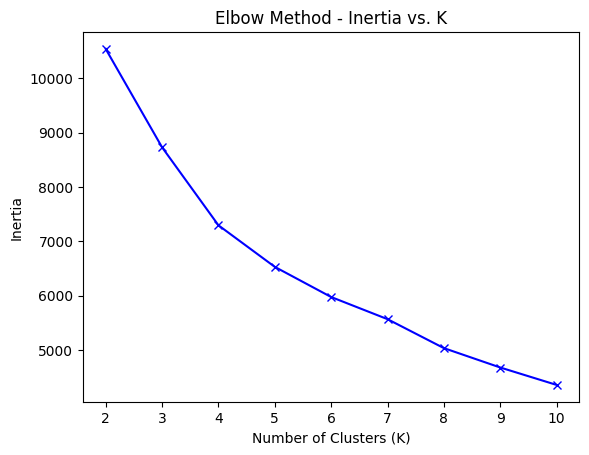

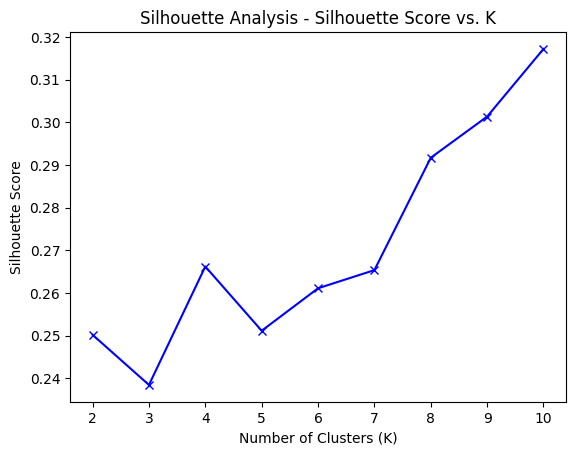

K = 4 is optimal


In [75]:
import warnings
warnings.filterwarnings("ignore")

k_values = range(2, 11)

inertia_scores = []
silhouette_scores = []

for k in k_values:
    # creating a KMeans model with the current K value
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(d.values)

    inertia_scores.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(d.values, kmeans.labels_))

plt.plot(k_values, inertia_scores, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Inertia vs. K')
plt.show()

# Plotting the silhouette scores
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis - Silhouette Score vs. K')
plt.show()

print("K = 4 is optimal")

### 5. KMeans Model Prediction

Once you decided the optimal K, once again fit a model with that K value and store the silhouette score and the labels for the entire data.

It is observed that the optimal value of k is 4. So, let's store the values of inertia and labels for k=4.

In [76]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(d.values)

# getting the inertia for K=4
inertia = kmeans.inertia_
# getting the labels for the entire data
labels = kmeans.labels_

### 6. KMeans Model Training - Scratch

Now, code the KMeans Model from scratch. Train it on the data, and try to find out when you have the labels with maximum accuracy when compared to the labels of the SkLearn model.

In [79]:
class KMeans_scratch:
    def __init__(self, k, max_iter=10):
        self.k = k  # k=4
        self.max_iter = max_iter

    def fit(self, X):
        n_samples, n_features = X.shape
        self.centroids = np.random.randn(self.k, n_features)

        # iterating until convergence
        for i in range(self.max_iter):
            # assigning each sample to its closest centroid
            distances = np.sqrt(
                ((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
            labels = np.argmin(distances, axis=0)
            # updating centroids as mean of samples assigned to them
            centroids = np.array([X[labels == k].mean(axis=0)
                                 for k in range(self.k)])

            if np.allclose(self.centroids, centroids):
                break
            self.centroids = centroids

        self.labels_ = labels


kmeans_scratch = KMeans_scratch(k=4)
kmeans_scratch.fit(d.values)

# comparing the labels obtained from Sklearn and KMeansScratch models
accuracy = np.mean(kmeans.labels_ == kmeans_scratch.labels_)
print("Accuracy :", accuracy)


Accuracy : 0.226


### 7. DBSCAN model training - Scikit-Learn

Using sklear.clusters.DBSCAN, you have to fit a model on the data.

But, here we would like to deal with two hyperparameters : epsilon and minimum number of samples.

Make two lists. One with some probable values for epsilon, other with probable values for min_samples.

Example : eps= [0.1,0.2,0.5,1,2] , min_samples=[3,4,5,6]

Run a nested loop. for each value of eps and min_samples, fit a dbscan model on the data and calculate the silhouette score. Find the parameters for which the silhouette score is maximum.

In [80]:
eps_values = [0.1, 0.2, 0.5, 1, 2]
min_samples_values = [3, 4, 5, 6]

# initializing variables to store the optimal parameters and silhouette score
optimal_eps = None
optimal_min_samples = None
max_silhouette_score = -1

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(d.values)
        silhouette = silhouette_score(d.values, dbscan.labels_)

        # checking if the current silhouette score is higher than the maximum score
        if silhouette > max_silhouette_score:
            max_silhouette_score = silhouette
            optimal_eps = eps
            optimal_min_samples = min_samples

print("Optimal Epsilon :", optimal_eps)
print("Optimal Minimum Samples :", optimal_min_samples)
print("Max Silhouette Score :", max_silhouette_score)


Optimal Epsilon : 1
Optimal Minimum Samples : 3
Max Silhouette Score : 0.5387078719701426


### 8. DBSCAN model training - Scratch

Code the DBScan model. For the same epsilon and min_samples values, fit the model on the data. You should receive the same silhouette score.

In [81]:
class DBScan:
    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples

    def fit(self, X):
        self.labels_ = np.zeros(X.shape[0])
        cluster_label = 0

        for i in range(X.shape[0]):
            if self.labels_[i] != 0:
                continue

            neighbors = self.get_neighbors(X, i)
            if len(neighbors) < self.min_samples:
                self.labels_[i] = -1
                continue

            cluster_label += 1
            self.labels_[i] = cluster_label

            j = 0
            while j < len(neighbors):
                neighbor = neighbors[j]
                if self.labels_[neighbor] == -1:
                    self.labels_[neighbor] = cluster_label

                elif self.labels_[neighbor] == 0:
                    self.labels_[neighbor] = cluster_label
                    new_neighbors = self.get_neighbors(X, neighbor)

                    if len(new_neighbors) >= self.min_samples:
                        neighbors = np.concatenate((neighbors, new_neighbors))

                j += 1

        return self

    def get_neighbors(self, X, i):
        distances = np.linalg.norm(X - X[i], axis=1)
        return np.where(distances <= self.eps)[0]


dbscan = DBScan(eps=1, min_samples=3)
dbscan.fit(d.values)
print(silhouette_score(d.values, dbscan.labels_))


0.5387078719701426
